<a href="https://colab.research.google.com/github/Triptishukla292/Applied-Stattistics/blob/main/Applied_Statistics_project_submitted_by_Tripti_Shukla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

# **Name**= Tripti Shukla

# **Project** **Name**=Applied Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [1]:
!pip install plotly

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats
import plotly.express as px

In [6]:
data=pd.read_csv('/content/drive/MyDrive/almabetter related files/Superstore Marketing Data - Sheet1 (2).csv') # Loading csv data from drive

In [8]:
# Info about Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
#Converting Dt_customer datatype in datetime
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'],errors='coerce')

In [11]:
# Checking for missing values in other columns
missing_values=data.isnull().sum()
print(missing_values)

Id                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                  24
Kidhome                  0
Teenhome                 0
Dt_Customer            916
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
Response                 0
Complain                 0
dtype: int64


Here we can see that there are 916 missing values in Dt_customer and 24 missing values in income column


In [12]:
# droping rows with missing dates
data=data.dropna(subset=['Dt_Customer'])

In [13]:
#imputing Missing values in numerical columns with 0
numerical_columns = ['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data[numerical_columns] = data[numerical_columns].fillna(0)

<ipython-input-13-d402b2da960a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
# Handaling missing values in categorical columns with the most frequent category
data['Education'] = data['Education'].fillna(data['Education'].mode()[0])
data['Marital_Status'] = data['Marital_Status'].fillna(data['Marital_Status'].mode()[0])

<ipython-input-14-a0a1105c8268>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-a0a1105c8268>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
# Checking missing values again
missing_values=data.isnull().sum()
print(missing_values)

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 13
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


In [16]:
# Descriptive Statistics for age
age_stats = data['Year_Birth'].describe()
print(age_stats)

count    1324.000000
mean     1968.685045
std        12.105909
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64


**Visualization**

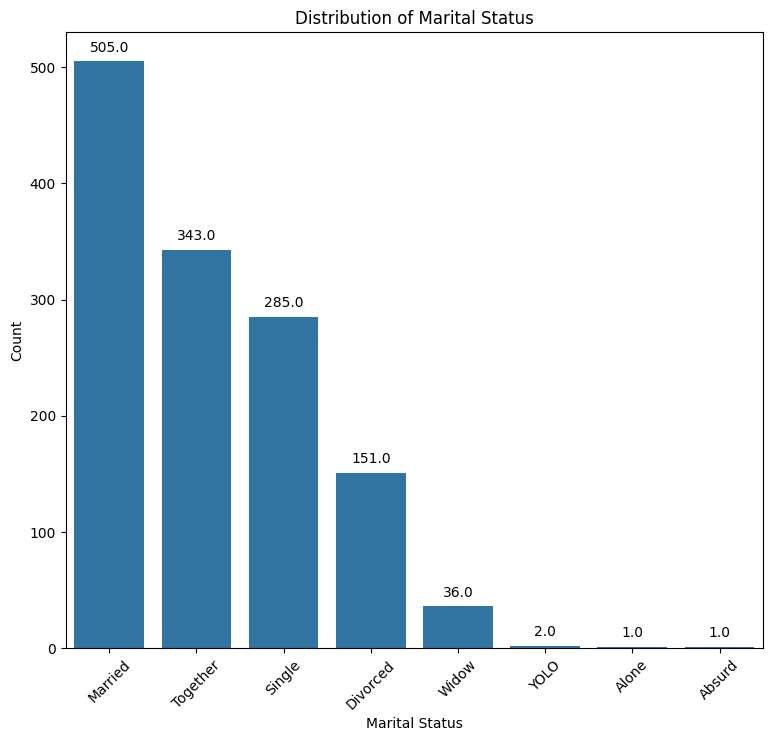

In [22]:
# plot Distribution of Marital status
plt.figure(figsize=(9,8))
mx=sns.countplot(data=data,x='Marital_Status',order=data['Marital_Status'].value_counts().index)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

#Add values on top of the bars
for t in mx.patches:
  mx.annotate(f'{t.get_height()}',(t.get_x() + t.get_width()/2., t.get_height()),
              ha='center', va='center',xytext=(0, 10),textcoords='offset points')

plt.show()

Here we can see that Married section are higher compariosn to other section

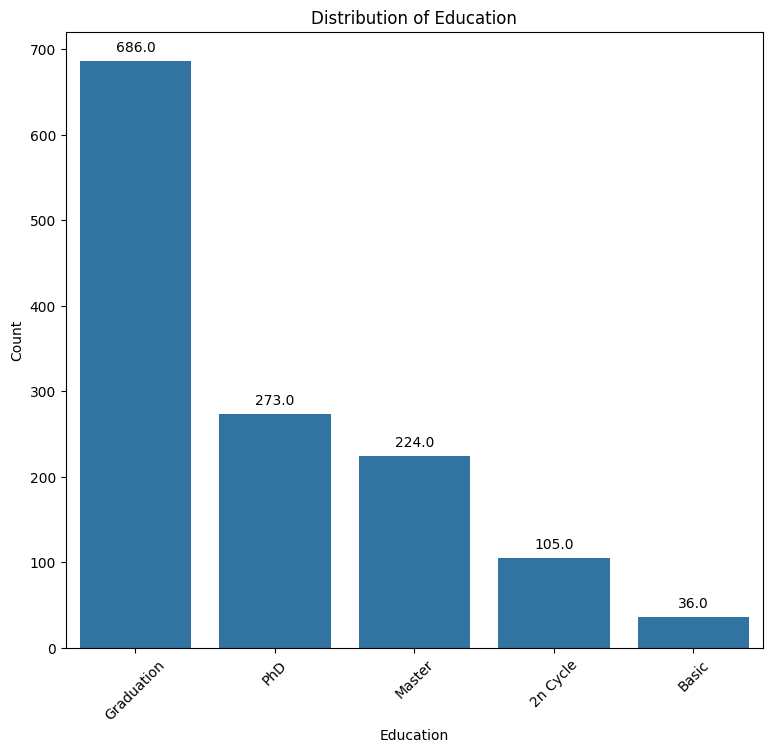

In [23]:
# Plot Distribution of Education
plt.figure(figsize=(9,8))
mx=sns.countplot(data=data,x='Education',order=data['Education'].value_counts().index)
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)

#Add values on top of the bars
for t in mx.patches:
  mx.annotate(f'{t.get_height()}',(t.get_x() + t.get_width()/2., t.get_height()),
              ha='center', va='center',xytext=(0, 10),textcoords='offset points')

plt.show()

Here we can see that Graduation section is higher than other section  

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [25]:
numerical_st= data.describe()

print(numerical_st)

                 Id   Year_Birth         Income      Kidhome     Teenhome  \
count   1324.000000  1324.000000    1311.000000  1324.000000  1324.000000   
mean    5455.487915  1968.685045   51429.747521     0.438822     0.502266   
std     3232.460262    12.105909   20960.186407     0.531718     0.543632   
min        1.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2745.250000  1959.000000   35541.000000     0.000000     0.000000   
50%     5243.000000  1970.000000   50447.000000     0.000000     0.000000   
75%     8210.500000  1977.000000   68211.000000     1.000000     1.000000   
max    11188.000000  1996.000000  157146.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  1324.000000  1324.000000  1324.000000      1324.000000   
mean     49.348187   301.964502    25.218278       162.177492   
std      28.815866   338.391676    38.587591       219.203801   
min       0.000000     0.000000     0.000000  

In [26]:
# Calculating measures of central tendency
mean_wines = data['MntWines'].mean()
print(mean_wines)

median_wines = data['MntWines'].median()
print(median_wines)

mode_wines = data['MntWines'].mode()
print(mode_wines)

301.964501510574
171.0
0    2
Name: MntWines, dtype: int64


In [27]:
# Calculating measures of dispersion
variance_wines = data['MntWines'].var()
print(variance_wines)

std_deviation_wines = data['MntWines'].std()
print(std_deviation_wines)

114508.92617654648
338.39167569038466


In [28]:
# Select key numerical variables
numerical_variables = ['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [29]:
# Calculate and display descriptive statistics for each numerical variable
for variable in numerical_variables:
    # Measures of central tendency
    mean = data[variable].mean()
    median = data[variable].median()
    mode_result = stats.mode(data[variable])

    try:
        mode_result = stats.mode(data[variable])
        mode = ", ".join(map(str, mode_result.mode.tolist()))  # Convert modes to a comma-separated string
    except Exception as e:
        mode = "N/A"  # Handle the case where mode cannot be calculated

    # Measures of dispersion
    variance = data[variable].var()
    std_deviation = data[variable].std()

    # Identify and handle outliers (using Z-score)
    z_scores = np.abs(stats.zscore(data[variable]))
    threshold = 3  # Define the threshold for identifying outliers

    # Identify outliers
    outliers = data[variable][z_scores > threshold]

    # Print statistics
    print(f"Variable: {variable}")
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Mode(s): {mode}")
    print(f"Variance: {variance:.2f}")
    print(f"Standard Deviation: {std_deviation:.2f}")
    print(f"Number of Outliers: {len(outliers)}")
    print(f"Outliers: {list(outliers)}\n")

Variable: Recency
Mean: 49.35
Median: 50.00
Mode(s): N/A
Variance: 830.35
Standard Deviation: 28.82
Number of Outliers: 0
Outliers: []

Variable: MntWines
Mean: 301.96
Median: 171.00
Mode(s): N/A
Variance: 114508.93
Standard Deviation: 338.39
Number of Outliers: 8
Outliers: [1394, 1486, 1492, 1492, 1459, 1379, 1396, 1324]

Variable: MntFruits
Mean: 25.22
Median: 7.00
Mode(s): N/A
Variance: 1489.00
Standard Deviation: 38.59
Number of Outliers: 35
Outliers: [174, 153, 168, 172, 151, 197, 185, 178, 189, 183, 160, 161, 144, 181, 142, 155, 147, 161, 168, 162, 193, 149, 172, 172, 172, 169, 168, 164, 161, 153, 166, 178, 190, 163, 144]

Variable: MntMeatProducts
Mean: 162.18
Median: 65.50
Mode(s): N/A
Variance: 48050.31
Standard Deviation: 219.20
Number of Outliers: 24
Outliers: [981, 849, 873, 1725, 827, 915, 915, 835, 853, 925, 925, 951, 929, 974, 921, 961, 951, 843, 899, 940, 932, 984, 968, 946]

Variable: MntFishProducts
Mean: 36.49
Median: 11.00
Mode(s): N/A
Variance: 2962.15
Standard Dev

In [30]:
# Choose the variable of interest (e.g., 'Year_Birth' for the normal distribution)
variable_name = 'Year_Birth'
variable_data = data[variable_name]

# Check for normality using the Shapiro-Wilk test
shapiro_test = stats.shapiro(variable_data)

# Calculate probabilities and expected value assuming a normal distribution
if shapiro_test.pvalue > 0.05:  # If p-value is greater than 0.05, data is approximately normally distributed
    mean = variable_data.mean()
    std_dev = variable_data.std()

    # Probability of an age falling within a certain range (e.g., 1960 to 1970)
    lower_bound = 1960
    upper_bound = 1970
    probability_within_range = stats.norm.cdf(upper_bound, loc=mean, scale=std_dev) - stats.norm.cdf(lower_bound, loc=mean, scale=std_dev)

    # Expected age of customers
    expected_age = mean
else:
    print(f"The '{variable_name}' variable does not follow a normal distribution.")

# Print results
print("Shapiro-Wilk Test (Normality Test):")
print(f"Statistic: {shapiro_test.statistic}")
print(f"P-value: {shapiro_test.pvalue}")
print(f"Is approximately normally distributed: {shapiro_test.pvalue > 0.05}\n")

if shapiro_test.pvalue > 0.05:
    print("Calculations assuming a normal distribution:")
    print(f"Mean: {mean:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Probability within the range [1960, 1970]: {probability_within_range:.4f}")
    print(f"Expected Age: {expected_age:.2f}")

The 'Year_Birth' variable does not follow a normal distribution.
Shapiro-Wilk Test (Normality Test):
Statistic: 0.9702507257461548
P-value: 7.142033051086899e-16
Is approximately normally distributed: False



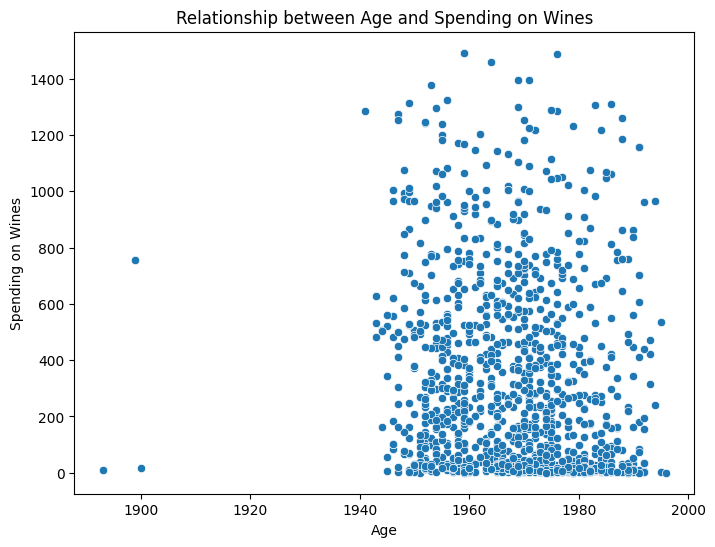

In [31]:
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Year_Birth', y='MntWines', data=data)
plt.xlabel('Age')
plt.ylabel('Spending on Wines')
plt.title('Relationship between Age and Spending on Wines')
plt.show()

- Here, we can see that Spending on Wines till 200 is most from age 1945 to 1995.

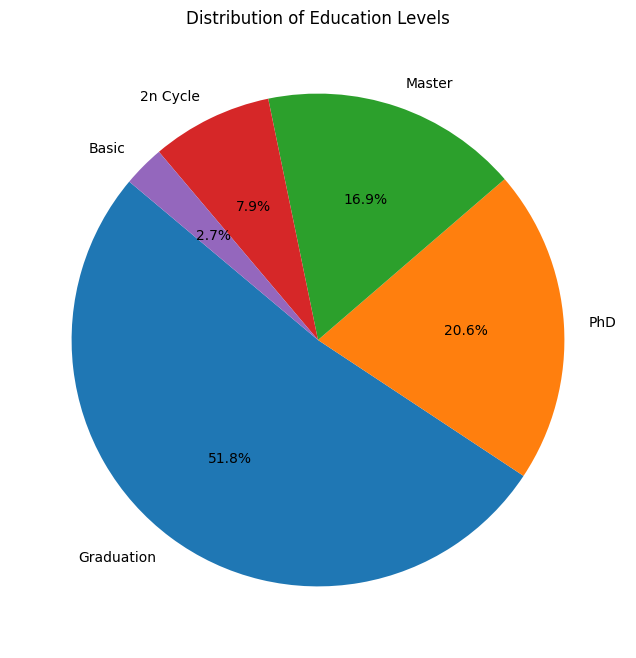

In [32]:
# Count the number of customers in each education category
education_counts = data['Education'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Education Levels')
plt.show()

- In this Pie Chart, it shows the "Distribution of Education Levels" between Graduated, PhD, Master, 2n Cycle & Basic degree's of people in percentages.
- We can see that Graduated People are number 1. Then PhD holder followed by Master, 2n Cycle, Basic holders.

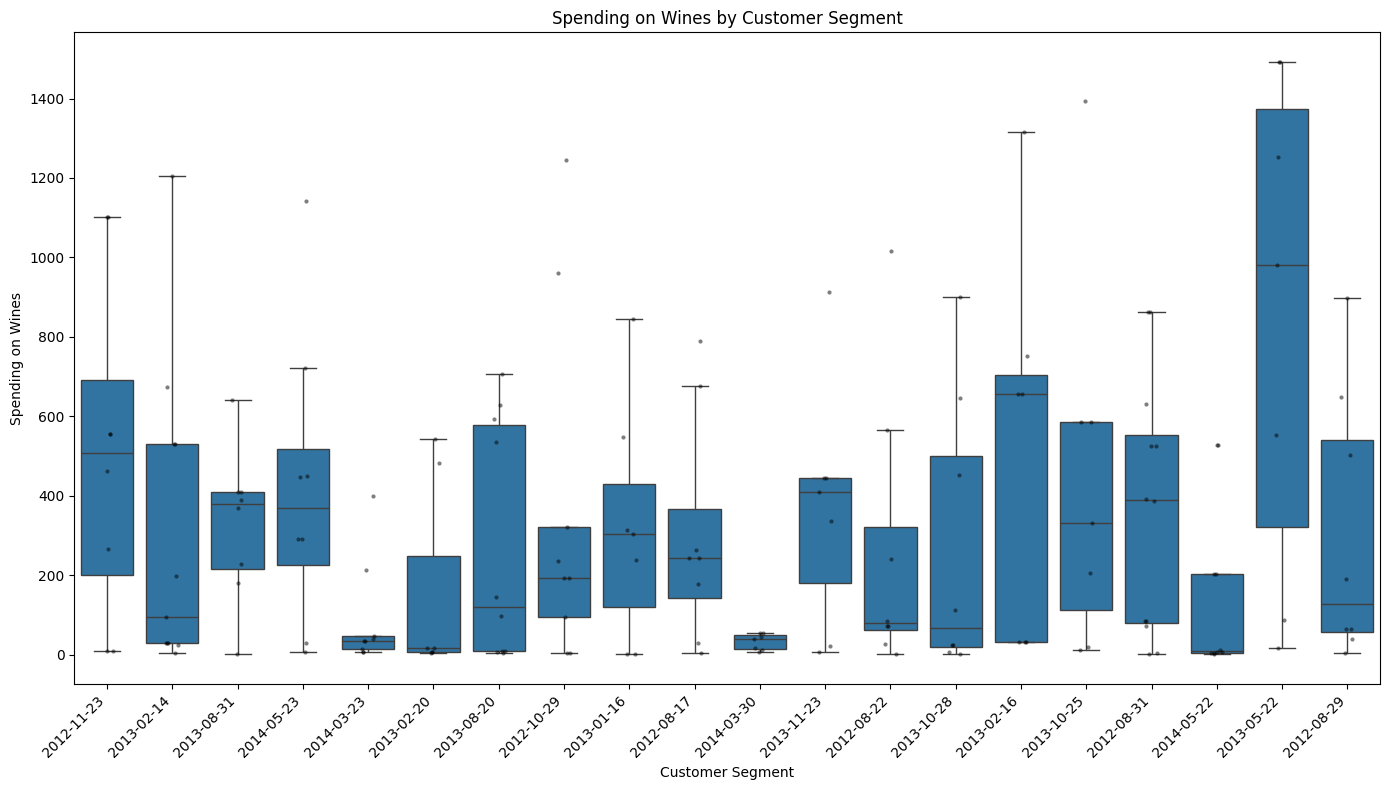

In [33]:
# Selecting top 20 values of 'Dt_Customer'
top_20_Dt_Customer = data['Dt_Customer'].value_counts().nlargest(20).index

# Filtering the data for the top 20 'Dt_Customer' values
filtered_data = data[data['Dt_Customer'].isin(top_20_Dt_Customer)]

# Spending on Wines by customer segments (clusters)
plt.figure(figsize=(14, 8))  # Increase the figure size
sns.boxplot(x='Dt_Customer', y='MntWines', data=filtered_data, showfliers=False)  # Set showfliers to False to remove outliers
sns.stripplot(x='Dt_Customer', y='MntWines', data=filtered_data, color='black', size=3, alpha=0.5)  # Add strip plot for individual data points

plt.xlabel('Customer Segment')
plt.ylabel('Spending on Wines')
plt.title('Spending on Wines by Customer Segment')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

- Here in this chart, Only top 20 customers are selected so that it can be visible clearly in the chart.
- This chart shows "Spending on Wines by Top 20 Customer Segment".

In [34]:
# Group data by product categories and calculate mean spending
category_mean = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# Create a bar chart using Plotly Express
fig = px.bar(x=category_mean.index, y=category_mean.values, labels={'x': 'Product Categories', 'y': 'Average Spending'},
             title='Average Spending on Product Categories', text=category_mean.values, height=400)

# Customize the layout if needed
fig.update_layout(xaxis=dict(tickangle=45), showlegend=False)

# Show the plot
fig.show()


- This chart shows the "Average Spending" by customers on different "Product Categories".
- Also, each "Product Categories" shows the "Average Spending" by cusromers to get clear idea by just looking into this chart.

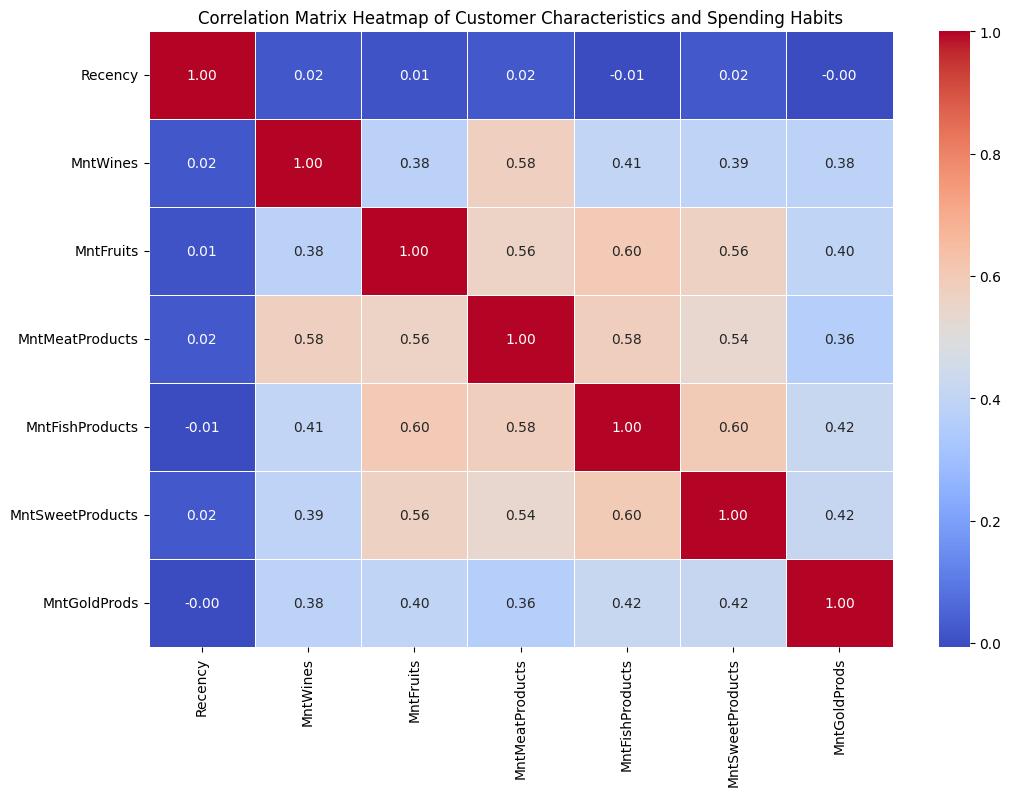

In [35]:
# A correlation matrix heatmap of Customer Characteristics and Spending Habits
correlation_matrix = data[numerical_variables].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap of Customer Characteristics and Spending Habits')
plt.show()

> Here, **'HeatMap'** Shows **the relationships between customer characteristics and spending habits**.

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!
https://drive.google.com/file/d/1XgpXkAjMIog8IqRDTGcyulNjVcc3L74u/view?usp=sharing

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍